# Description

It projects input data into a UMAP representation.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd

import conf
from utils import generate_result_set_name

# Settings

In [3]:
np.random.seed(0)

In [4]:
NULL_DIR = conf.RESULTS["CLUSTERING_NULL_DIR"] / "shuffle_lvs"

## Input data

In [5]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [6]:
INPUT_FILEPATH = Path(
    NULL_DIR,
    "data_transformations",
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [7]:
# output dir for this notebook
RESULTS_DIR = Path(NULL_DIR, "data_transformations", "umap").resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/umap')

## UMAP options

In [8]:
# parameters of the dimentionality reduction steps
# note that these are the default parameters of UMAP (metric and n_neighbors)
DR_OPTIONS = {
    "n_components": [5, 10, 20, 30, 40, 50],
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [9]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': [5, 10, 20, 30, 40, 50],
 'metric': 'euclidean',
 'n_neighbors': 15,
 'random_state': 0}

# Load input file

In [10]:
data = pd.read_pickle(INPUT_FILEPATH)

In [11]:
display(data.shape)

(3752, 987)

In [12]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-2.408007,-1.745911,1.383013,0.158718,-0.240933,-0.304911,1.823117,-0.716278,-1.769346,-0.043794,...,0.399227,0.849885,-0.593292,0.636568,0.409726,-0.871713,1.638770,0.285165,0.585307,0.592347
100002_raw-Energy,-0.508508,0.514427,-0.792865,-0.091775,-0.013409,0.194047,1.353713,0.117286,-0.323516,-1.641116,...,-0.038535,-1.139394,-0.951591,1.197872,0.893819,-0.820655,0.928634,-0.716778,-0.085735,-1.208965
100003_raw-Protein,-0.284597,-0.325076,-1.412980,1.255510,0.343603,-2.471878,-0.149640,-0.715178,-0.548948,1.210352,...,1.006094,0.595064,1.774559,-0.335165,0.394177,-0.188345,-1.864716,-0.124875,1.253625,0.804944
100004_raw-Fat,-0.427503,-0.096524,-0.348654,-1.250087,-0.253145,-0.236606,-0.600627,0.277239,-0.844748,-0.998437,...,0.249993,-1.520660,0.037241,0.514992,0.512538,-1.083619,0.310643,-1.719033,-0.970770,-2.628077
100005_raw-Carbohydrate,-1.502621,-1.083034,0.531159,0.332981,-1.240640,-0.852565,-0.003171,0.561912,-0.772413,-0.372739,...,-0.577730,-1.163380,0.000251,-0.345607,-1.610004,0.194078,0.605594,1.182825,-1.567705,-0.011902


# UMAP

**Reproducibility problem**: there seems to be a bug with UMAP in which it produces different results in different operating systems or machines: https://github.com/lmcinnes/umap/issues/153

In [13]:
from data.dimreduction import get_umap_proj

In [14]:
# Get a UMAP representation for all n_components configurations
for n_comp in DR_OPTIONS["n_components"]:
    print(f"# components: {n_comp}")

    # prepare options of n_comp
    options = ALL_OPTIONS.copy()
    options["n_components"] = n_comp
    options = {k: v for k, v in options.items() if k in DR_OPTIONS}

    # get projection
    dr_data = get_umap_proj(data, options)

    # check data dimensionality
    display(dr_data.shape)
    assert dr_data.shape == (data.shape[0], n_comp)

    display(dr_data.iloc[:, 0:5].describe())

    # save
    output_file = Path(
        RESULTS_DIR,
        generate_result_set_name(
            options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
        ),
    ).resolve()
    display(output_file)

    dr_data.to_pickle(output_file)

    print("\n")

# components: 5


'UMAP object: UMAP(n_components=5, random_state=0)'

(3752, 5)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,7.056624,4.299493,5.700325,3.281438,4.706983
std,1.178909,0.959035,1.119171,1.299585,1.158186
min,5.251172,1.869083,3.322843,1.119064,2.318881
25%,5.942406,3.732643,4.738925,2.251545,3.961518
50%,6.756095,4.369141,5.852138,3.075240,4.521660
75%,7.978721,4.879948,6.386735,4.263915,5.472385
max,9.712301,6.763623,8.010193,5.997150,6.998354


PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')



# components: 10


'UMAP object: UMAP(n_components=10, random_state=0)'

(3752, 10)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,7.131619,4.405649,5.423148,3.129666,5.167095
std,1.011794,0.508062,0.919644,0.593975,0.620775
min,5.282296,3.155950,3.583269,1.339270,3.451200
25%,6.150809,4.089729,4.570633,2.805111,4.788500
50%,7.095189,4.370671,5.737132,3.290308,5.127985
75%,8.156885,4.671269,6.253318,3.520478,5.656591
max,8.808816,5.901020,6.753774,4.276455,6.623301


PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_10-n_neighbors_15-random_state_0.pkl')



# components: 20


'UMAP object: UMAP(n_components=20, random_state=0)'

(3752, 20)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,2.903711,5.639574,4.399845,6.898227,4.697737
std,0.669113,0.406460,0.709638,0.344398,0.289868
min,1.480770,4.464692,3.180578,5.974429,4.034480
25%,2.287572,5.414824,3.849612,6.748730,4.506766
50%,3.026317,5.580058,4.259838,6.924059,4.703607
75%,3.494929,5.902992,4.844639,7.134440,4.937369
max,4.097645,6.647450,6.269678,7.617167,5.326900


PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_20-n_neighbors_15-random_state_0.pkl')



# components: 30


'UMAP object: UMAP(n_components=30, random_state=0)'

(3752, 30)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,7.125528,4.508515,4.513098,6.895745,4.867744
std,0.363904,0.364126,0.518094,0.358380,0.413683
min,6.482872,3.779524,3.621205,6.146198,3.972585
25%,6.879375,4.228674,4.007683,6.574384,4.505201
50%,7.024045,4.469951,4.464816,6.900572,4.810750
75%,7.368142,4.794472,4.960902,7.169091,5.270285
max,8.116904,5.336001,5.650571,7.706613,5.774452


PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_30-n_neighbors_15-random_state_0.pkl')



# components: 40


'UMAP object: UMAP(n_components=40, random_state=0)'

(3752, 40)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,2.889124,5.578220,4.475708,6.944389,4.782382
std,0.278196,0.315182,0.513197,0.233106,0.341043
min,2.301562,4.736373,3.415025,6.291540,4.135366
25%,2.677198,5.393692,4.014491,6.831439,4.479187
50%,2.832150,5.684127,4.447037,6.980539,4.723428
75%,3.147756,5.809849,4.817667,7.105936,5.114794
max,3.561509,6.128525,5.667970,7.493430,5.474628


PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_40-n_neighbors_15-random_state_0.pkl')



# components: 50


'UMAP object: UMAP(n_components=50, random_state=0)'

(3752, 50)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,7.135800,4.435353,4.505740,6.926033,4.869213
std,0.182457,0.649280,0.430654,0.505657,0.394133
min,6.464737,3.263527,3.682720,5.379001,4.247713
25%,7.052443,3.761634,4.162183,6.644610,4.513245
50%,7.137530,4.530117,4.410868,7.037523,4.821441
75%,7.239742,4.966978,4.898410,7.336941,5.211712
max,7.581992,5.704933,5.335385,7.731616,5.649370


PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

## Plots

In [15]:
import seaborn as sns

Plot the data from the UMAP version with 5 components.

In [16]:
# prepare options of 5 components
options = ALL_OPTIONS.copy()
options["n_components"] = 5
options = {k: v for k, v in options.items() if k in DR_OPTIONS}

# load
input_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

dr_data = pd.read_pickle(input_file)

## Full plot

[2022-11-25 05:00:00,354 - numexpr.utils] INFO: Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2022-11-25 05:00:00,354 - numexpr.utils] INFO: NumExpr defaulting to 8 threads.


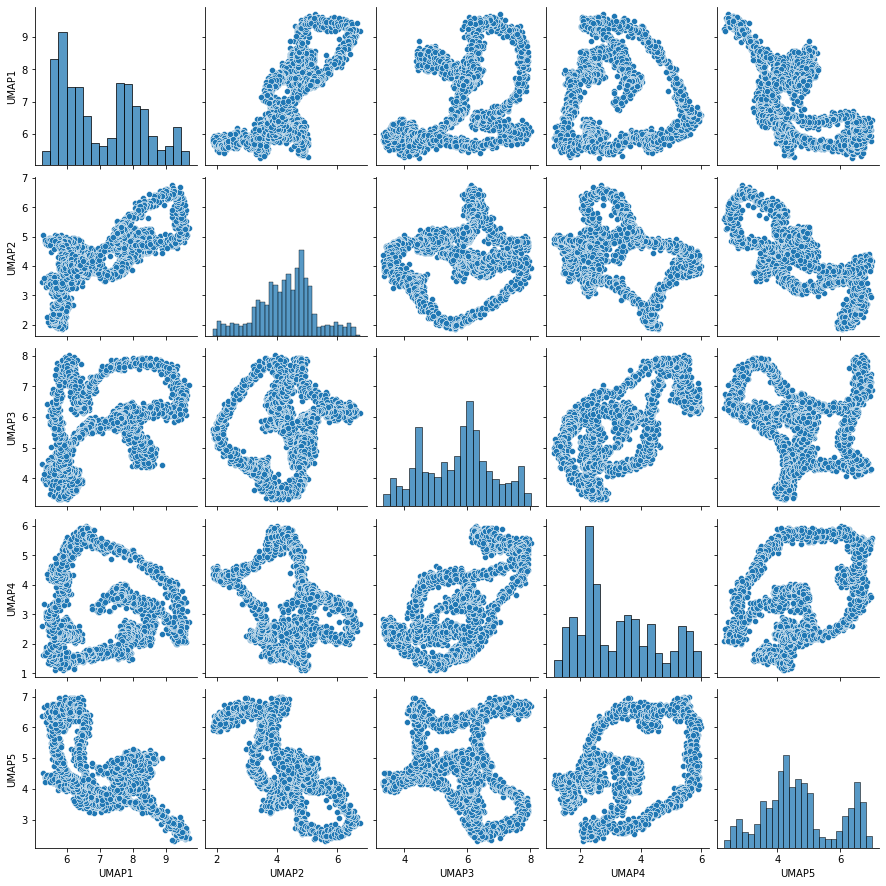

In [17]:
g = sns.pairplot(data=dr_data)

## Full plot (density)

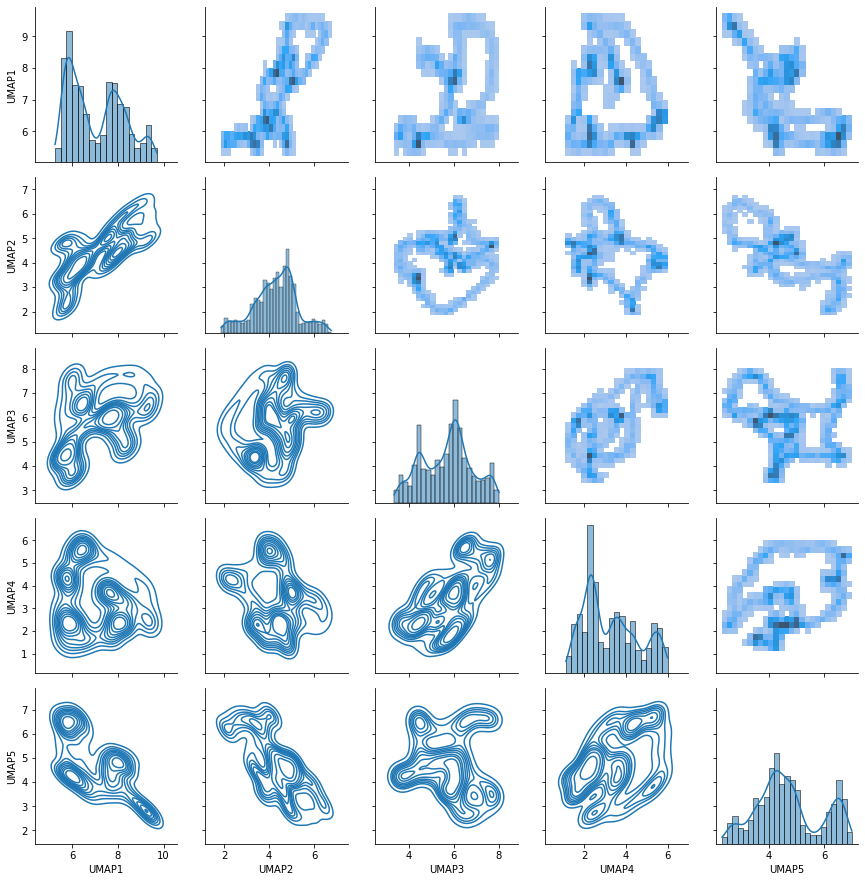

In [18]:
g = sns.PairGrid(data=dr_data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)

## Density plot without "outliers"

In [19]:
# remove "outliers" just to take a look at the big cluster
dr_data_thin = dr_data[(dr_data["UMAP1"] < 10) & (dr_data["UMAP2"] < 5)]

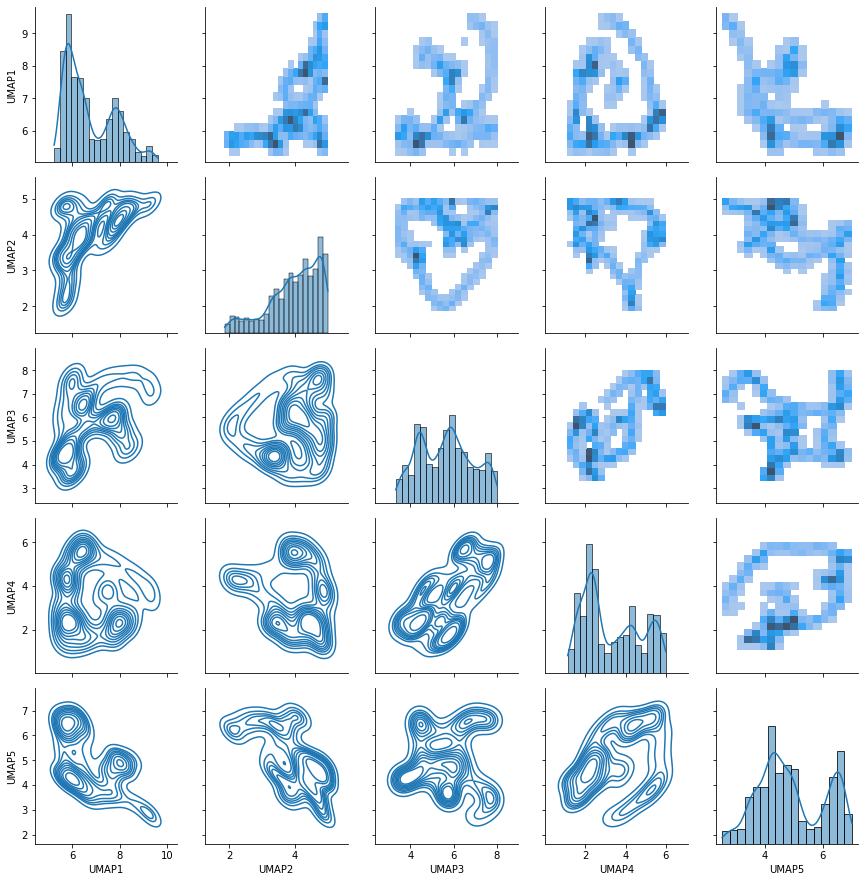

In [20]:
g = sns.PairGrid(data=dr_data_thin)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)